# Proyek Analisis Data: Air Quality Dataset
- **Nama:** [Frans Christiopan Hutapea]
- **Email:** [franshutapea05@gmail.com]
- **ID Dicoding:** [frans_pemula]

## Menentukan Pertanyaan Bisnis

- Di antara ketiga kota tersebut, kota mana yang memiliki distribusi polutan O3 tertinggi?
- Bagaimana pengaruh TEMP terhadap konsentrasi polutan CO dan O3 pada kota Dingling?
- Bagaimana pengaruh RAIN terhadap konsentrasi polutan PM10 dan PM2.5 pada kota Aotizhongxin?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data **Wrangling**

### Gathering Data

In [2]:
dingling_df = pd.read_csv('https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv')
dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [3]:
changping_df = pd.read_csv('https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv')
changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [4]:
aotizhongxin_df = pd.read_csv('https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Sekilas kita melihat data pada kota Dingling dan Kota Changping memiliki nilai Temperature (TEMP), Tekanan Udara (PRES), titik embun (DEWP) yang sama
- Perubahan konsentrasi CO pada kota Dingling dan kota Aotizhongxin cenderung stabil ketika kolom hour bernilai 0 sampai 4

### Assessing Data

#### Menilai tabel `dingling_df`

In [5]:
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [6]:
print("Total Missing Values: ", dingling_df.isna().sum().sum())
dingling_df.isna().sum()

Total Missing Values:  7015


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,779
PM10,656
SO2,730
NO2,1234
CO,2012


In [7]:
print("Jumlah duplikasi: ", dingling_df.duplicated().sum())
dingling_df.head()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


#### Menilai tabel `changping_df`

In [8]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [9]:
print('Total Missing Values: ', changping_df.isna().sum().sum())
changping_df.isna().sum()

Total Missing Values:  5166


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,774
PM10,582
SO2,628
NO2,667
CO,1521


In [10]:
print('Jumlah Duplikasi: ', changping_df.duplicated().sum())
changping_df.head()

Jumlah Duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


#### Menilai tabel `aotizhongxin_df`

In [11]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [12]:
print('Total Missing Values: ', aotizhongxin_df.isna().sum().sum())
aotizhongxin_df.isna().sum()

Total Missing Values:  7271


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


In [13]:
print('Jumlah Duplikasi: ', aotizhongxin_df.duplicated().sum())
aotizhongxin_df.head()

Jumlah Duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Telah dilakukan analisis pada tiap tabel dan hasilnya setiap data dari tiga tabel tersebut memiliki nilai unik. Artinya, tidak terdapat `duplicate data` pada setiap tabel
- Terdapat missing value pada ketiga tabel, terutama pada kolom polutan (PM2.5, PM10, SO2, dll).
- Terdapat inaccurate value pada kolom year, month, day, hour. Seharusnya ketiga kolom tersebut dijadikan satu kolom dan menggunakan tipe data `datetime` bukan `object` (object merupakan tipe data yang merujuk pada string)

### Cleaning Data

#### Membersihkan tabel `dingling_df`

Missing Value

In [14]:
dingling_df.dropna(inplace=True)
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31306 entries, 2 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       31306 non-null  int64  
 1   year     31306 non-null  int64  
 2   month    31306 non-null  int64  
 3   day      31306 non-null  int64  
 4   hour     31306 non-null  int64  
 5   PM2.5    31306 non-null  float64
 6   PM10     31306 non-null  float64
 7   SO2      31306 non-null  float64
 8   NO2      31306 non-null  float64
 9   CO       31306 non-null  float64
 10  O3       31306 non-null  float64
 11  TEMP     31306 non-null  float64
 12  PRES     31306 non-null  float64
 13  DEWP     31306 non-null  float64
 14  RAIN     31306 non-null  float64
 15  wd       31306 non-null  object 
 16  WSPM     31306 non-null  float64
 17  station  31306 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.5+ MB


Inaccurate Value

In [15]:
dingling_df['date']= pd.to_datetime(dingling_df[['year','month','day','hour']])
dingling_df['date'].info()

<class 'pandas.core.series.Series'>
Index: 31306 entries, 2 to 35063
Series name: date
Non-Null Count  Dtype         
--------------  -----         
31306 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 489.2 KB


#### Membersihkan tabel `changping_df`

Missing Value

In [16]:
changping_df.dropna(inplace=True)
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32681 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       32681 non-null  int64  
 1   year     32681 non-null  int64  
 2   month    32681 non-null  int64  
 3   day      32681 non-null  int64  
 4   hour     32681 non-null  int64  
 5   PM2.5    32681 non-null  float64
 6   PM10     32681 non-null  float64
 7   SO2      32681 non-null  float64
 8   NO2      32681 non-null  float64
 9   CO       32681 non-null  float64
 10  O3       32681 non-null  float64
 11  TEMP     32681 non-null  float64
 12  PRES     32681 non-null  float64
 13  DEWP     32681 non-null  float64
 14  RAIN     32681 non-null  float64
 15  wd       32681 non-null  object 
 16  WSPM     32681 non-null  float64
 17  station  32681 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.7+ MB


Inaccurate Value

In [17]:
changping_df['date']= pd.to_datetime(changping_df[['year','month','day','hour']])
changping_df['date'].info()

<class 'pandas.core.series.Series'>
Index: 32681 entries, 0 to 35063
Series name: date
Non-Null Count  Dtype         
--------------  -----         
32681 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 510.6 KB


#### Membersihkan tabel `aotizhongxin_df`

Missing Value

In [18]:
aotizhongxin_df.dropna(inplace=True)
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31815 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       31815 non-null  int64  
 1   year     31815 non-null  int64  
 2   month    31815 non-null  int64  
 3   day      31815 non-null  int64  
 4   hour     31815 non-null  int64  
 5   PM2.5    31815 non-null  float64
 6   PM10     31815 non-null  float64
 7   SO2      31815 non-null  float64
 8   NO2      31815 non-null  float64
 9   CO       31815 non-null  float64
 10  O3       31815 non-null  float64
 11  TEMP     31815 non-null  float64
 12  PRES     31815 non-null  float64
 13  DEWP     31815 non-null  float64
 14  RAIN     31815 non-null  float64
 15  wd       31815 non-null  object 
 16  WSPM     31815 non-null  float64
 17  station  31815 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.6+ MB


Inaccurate Value

In [19]:
aotizhongxin_df['date']= pd.to_datetime(aotizhongxin_df[['year','month','day','hour']])
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31815 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       31815 non-null  int64         
 1   year     31815 non-null  int64         
 2   month    31815 non-null  int64         
 3   day      31815 non-null  int64         
 4   hour     31815 non-null  int64         
 5   PM2.5    31815 non-null  float64       
 6   PM10     31815 non-null  float64       
 7   SO2      31815 non-null  float64       
 8   NO2      31815 non-null  float64       
 9   CO       31815 non-null  float64       
 10  O3       31815 non-null  float64       
 11  TEMP     31815 non-null  float64       
 12  PRES     31815 non-null  float64       
 13  DEWP     31815 non-null  float64       
 14  RAIN     31815 non-null  float64       
 15  wd       31815 non-null  object        
 16  WSPM     31815 non-null  float64       
 17  station  31815 non-null  object     

**Insight:**
- Dengan menghapus baris kosong pada kolom year, month, day, dan hour, proses konversi datetime lebih aman
- Penambahan kolom date meningkatkan akurasi analisis temporal dan proses clustering data berdasarkan waktu (Tahun, Bulan, Hari, Jam)
-Sekilas kita dapat melihat bahwa kota Changping memiliki total missing value paling sedikit

## Exploratory Data Analysis (EDA)

### Explore ...

`dingling_df`

In [20]:
print('Data Dingling')
dingling_df.describe()

Data Dingling


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,date
count,31306.000000,31306.000000,31306.000000,31306.000000,31306.000000,31306.000000,31306.000000,31306.000000,31306.000000,31306.000000,31306.000000,31306.000000,31306.000000,31306.000000,31306.000000,31306.000000,31306
mean,17951.165719,2014.718297,6.422603,15.881237,11.504248,66.512518,84.527803,11.944167,27.267578,916.547211,69.449698,13.556274,1007.708007,1.403411,0.062387,1.850939,2015-03-18 22:09:56.588513280
min,3.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.600000,982.800000,-35.100000,0.000000,0.000000,2013-03-01 02:00:00
25%,9888.250000,2014.000000,3.000000,8.000000,6.000000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.000000,999.200000,-10.500000,0.000000,1.000000,2014-04-16 23:15:00
50%,18100.500000,2015.000000,6.000000,16.000000,11.000000,41.000000,61.000000,5.000000,19.000000,600.000000,62.000000,14.600000,1007.100000,1.600000,0.000000,1.500000,2015-03-25 03:30:00
75%,26268.750000,2016.000000,9.000000,23.000000,18.000000,93.000000,118.000000,15.000000,37.000000,1200.000000,91.000000,23.300000,1016.000000,14.300000,0.000000,2.300000,2016-02-28 11:45:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,647.000000,905.000000,150.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000,2017-02-28 23:00:00
std,9928.922785,1.147383,3.457774,8.724373,6.952859,72.434045,80.077511,15.625691,26.199002,910.281798,54.576024,11.451666,10.286864,13.851456,0.776216,1.295511,NaN


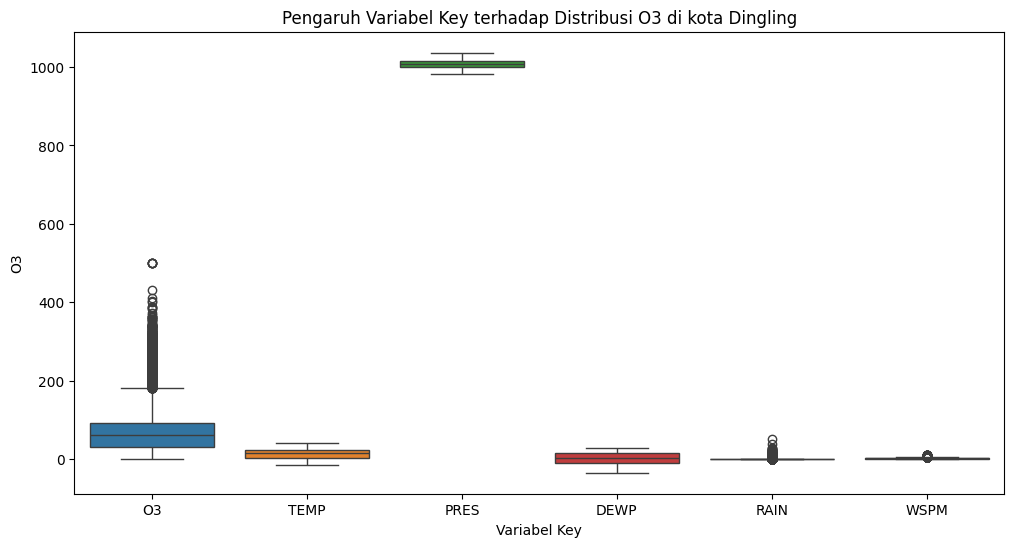

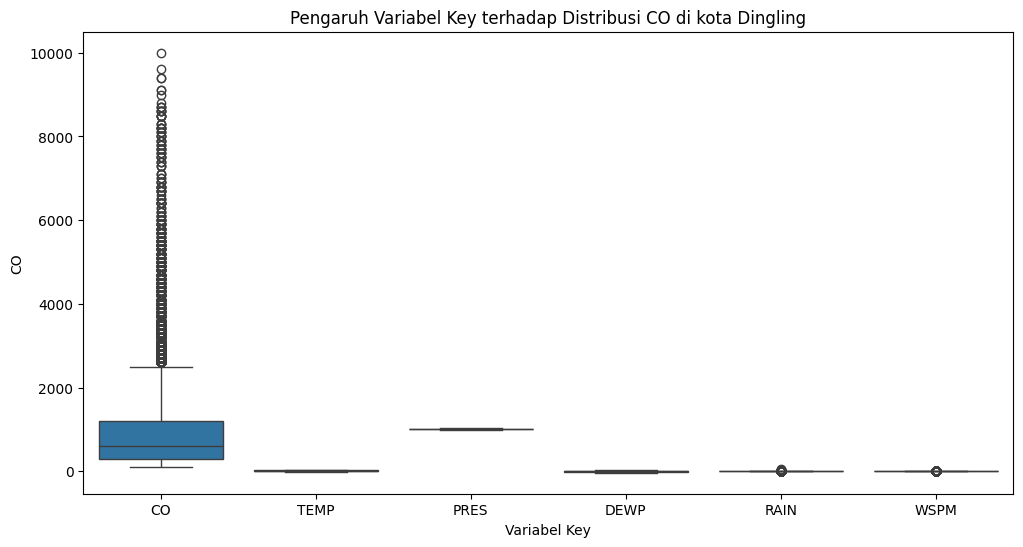

In [21]:
# Visualisasi distribusi variabel key terhadap distribusi O3 menggunakan boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=dingling_df[['O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']])
plt.title('Pengaruh Variabel Key terhadap Distribusi O3 di kota Dingling')
plt.xlabel('Variabel Key')
plt.ylabel('O3')
plt.show()

# Visualisasi distribusi variabel key terhadap distribusi CO menggunakan boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=dingling_df[['CO', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']])
plt.title('Pengaruh Variabel Key terhadap Distribusi CO di kota Dingling')
plt.xlabel('Variabel Key')
plt.ylabel('CO')
plt.show()

`changping_df`


In [22]:
print('Kota Changping')
changping_df.describe()

Kota Changping


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,date
count,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681.000000,32681
mean,17876.569658,2014.703130,6.507481,15.715156,11.506992,70.312328,94.086402,15.061357,44.319035,1151.716441,57.424541,13.401677,1007.994009,1.135299,0.060736,1.865757,2015-03-15 19:34:10.769560320
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000,2013-03-01 00:00:00
25%,9384.000000,2014.000000,3.000000,8.000000,6.000000,18.000000,33.000000,2.000000,22.000000,500.000000,15.000000,3.100000,999.500000,-10.600000,0.000000,1.000000,2014-03-26 23:00:00
50%,17910.000000,2015.000000,7.000000,16.000000,11.000000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.100000,1007.700000,1.100000,0.000000,1.500000,2015-03-17 05:00:00
75%,26546.000000,2016.000000,10.000000,23.000000,18.000000,99.000000,130.000000,18.000000,61.000000,1400.000000,79.000000,23.100000,1016.300000,13.900000,0.000000,2.300000,2016-03-11 01:00:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,662.000000,992.000000,310.000000,208.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000,2017-02-28 23:00:00
std,10010.547363,1.165678,3.478965,8.729951,6.940587,70.955607,82.610340,21.057574,29.591375,1105.646637,53.792603,11.393462,10.177785,13.841226,0.765286,1.308218,NaN


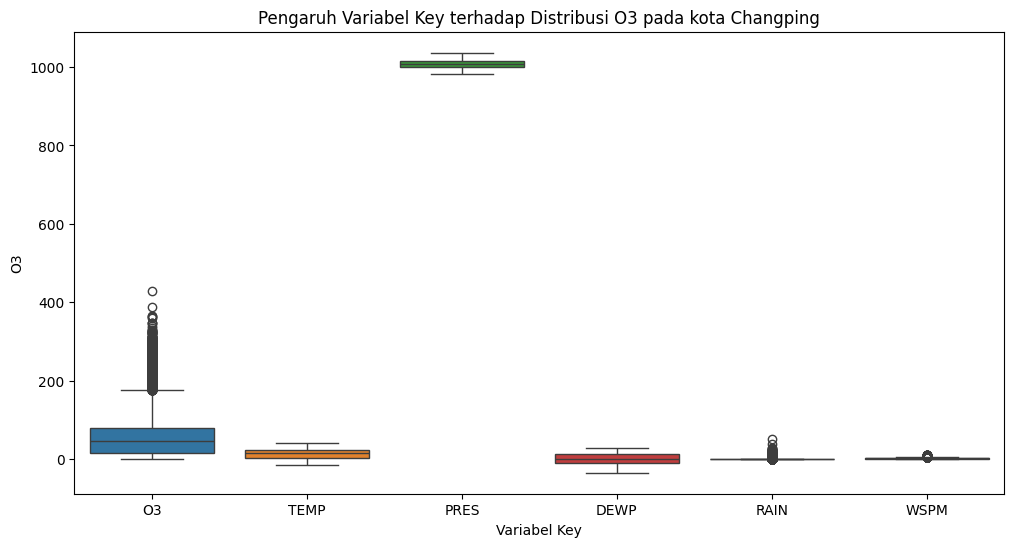

In [23]:
# Visualisasi distribusi variabel key terhadap distribusi O3 menggunakan boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=changping_df[['O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']])
plt.title('Pengaruh Variabel Key terhadap Distribusi O3 pada kota Changping')
plt.xlabel('Variabel Key')
plt.ylabel('O3')
plt.show()

`aotizhongxin_df`

In [24]:
print('Kota Aotizhongxin')
aotizhongxin_df.describe()

Kota Aotizhongxin


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,date
count,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.00000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815
mean,17899.423857,2014.714914,6.401886,15.578564,11.624800,81.86363,109.120685,17.167205,58.976332,1256.574729,56.240938,13.775611,1011.800385,3.241106,0.068235,1.720471,2015-03-16 18:25:25.884016896
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.00000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000,2013-03-01 00:00:00
25%,9415.500000,2014.000000,3.000000,8.000000,6.000000,22.00000,37.000000,3.000000,30.000000,500.000000,8.000000,3.400000,1003.300000,-8.000000,0.000000,0.900000,2014-03-28 06:30:00
50%,18093.000000,2015.000000,6.000000,15.000000,12.000000,58.00000,86.000000,8.000000,53.000000,800.000000,42.000000,14.800000,1011.200000,4.000000,0.000000,1.400000,2015-03-24 20:00:00
75%,26590.500000,2016.000000,9.000000,23.000000,18.000000,114.00000,154.000000,21.000000,82.000000,1500.000000,82.000000,23.400000,1020.000000,15.700000,0.000000,2.200000,2016-03-12 21:30:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,713.00000,948.000000,229.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,46.400000,11.200000,2017-02-28 23:00:00
std,10058.429849,1.162536,3.416847,8.794954,6.926874,80.44949,93.718017,22.760801,37.061384,1223.301208,57.834314,11.369035,10.338869,13.667863,0.837489,1.204240,NaN


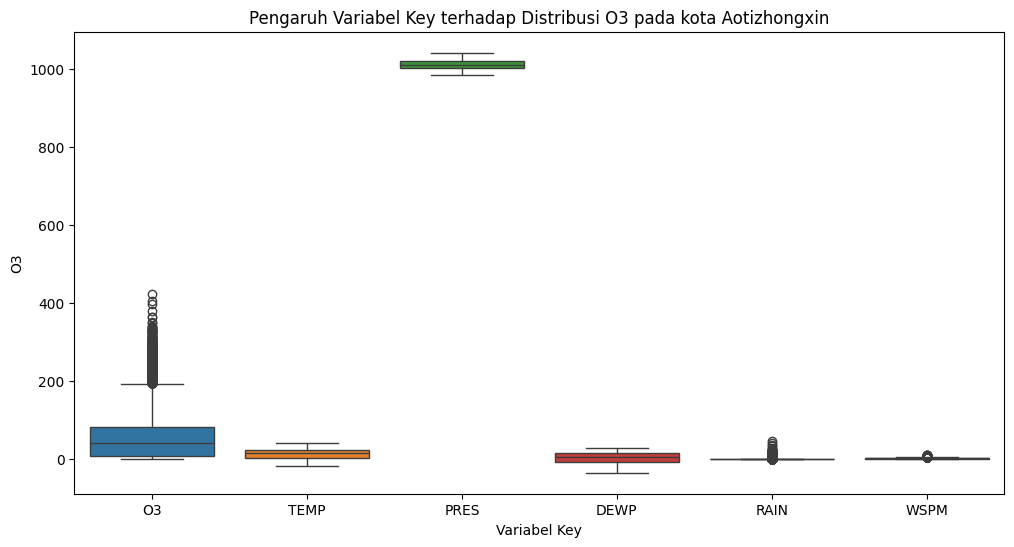

In [25]:
# Visualisasi distribusi variabel key terhadap distribusi O3 menggunakan boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=aotizhongxin_df[['O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']])
plt.title('Pengaruh Variabel Key terhadap Distribusi O3 pada kota Aotizhongxin')
plt.xlabel('Variabel Key')
plt.ylabel('O3')
plt.show()

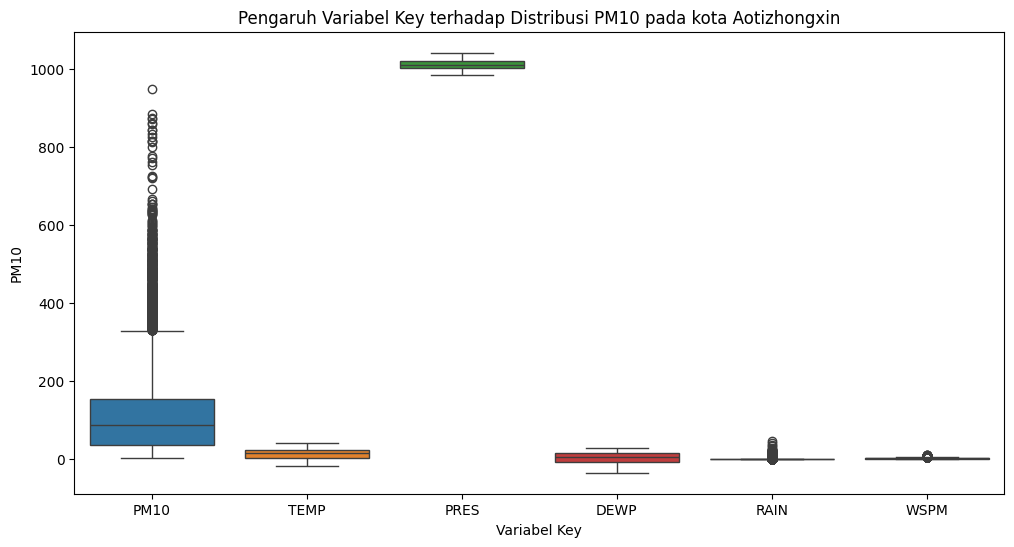

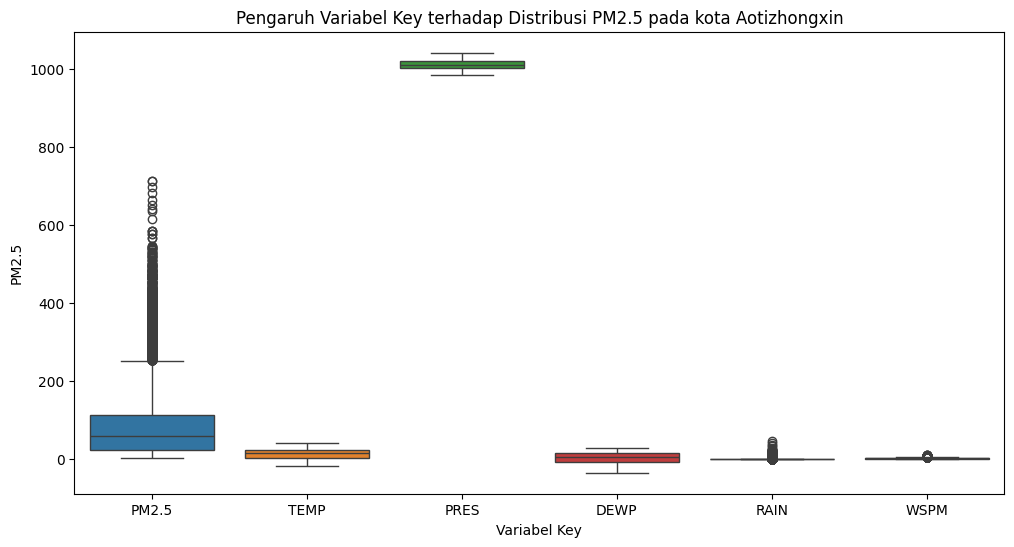

In [26]:
# Visualisasi distribusi variabel key terhadap distribusi PM10 menggunakan boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=aotizhongxin_df[['PM10', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']])
plt.title('Pengaruh Variabel Key terhadap Distribusi PM10 pada kota Aotizhongxin')
plt.xlabel('Variabel Key')
plt.ylabel('PM10')
plt.show()

# Visualisasi distribusi variabel key terhadap distribusi PM2.5 menggunakan boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=aotizhongxin_df[['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']])
plt.title('Pengaruh Variabel Key terhadap Distribusi PM2.5 pada kota Aotizhongxin')
plt.xlabel('Variabel Key')
plt.ylabel('PM2.5')
plt.show()

**Insight:**
- Tidak terjadi perubahan yang signifikan terhadap nilai DEWP di ketiga kota, menunjukkan bahwa kelembapan relatif tidak berubah secara ekstrem.

- Kestabilan WSPM pada boxplot dari ketiga kota tersebut dapat diartikan bahwa WSPM bisa berdampak pada pola konsentrasi O3.

- Curah hujan (RAIN) rendah, tetapi ada beberapa titik yang menunjukkan hujan sesekali dapat membantu mengurangi polusi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Di antara ketiga kota tersebut, kota mana yang memiliki distribusi polutan O3 tertinggi?


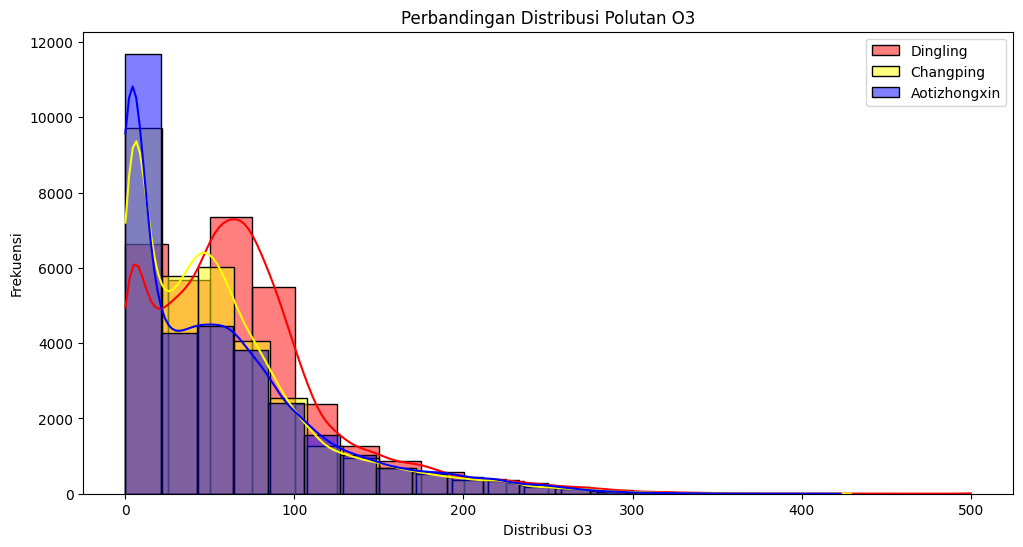

In [27]:
# Melihat perbedaan distribusi polutan O3 dari ketiga kota
plt.figure(figsize=(12, 6))
sns.histplot(dingling_df['O3'], bins=20, color = 'red', label='Dingling', kde=True)
sns.histplot(changping_df['O3'], bins=20, color = 'yellow', label='Changping', kde=True)
sns.histplot(aotizhongxin_df['O3'], bins=20, color = 'blue', label='Aotizhongxin', kde=True)
plt.title('Perbandingan Distribusi Polutan O3')
plt.xlabel('Distribusi O3')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

### Pertanyaan 2:

Bagaimana pengaruh TEMP terhadap distribusi polutan CO dan O3 pada kota Dingling?

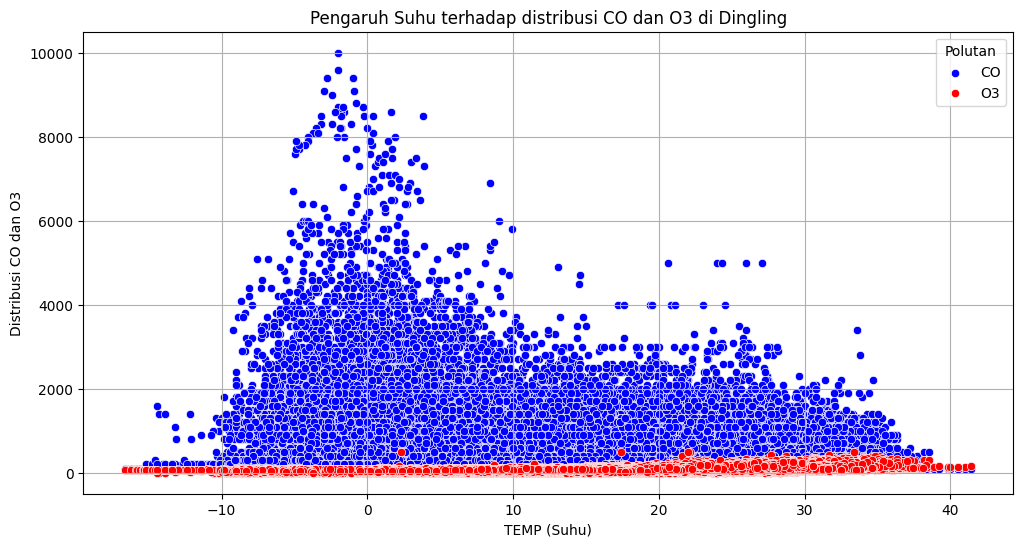

In [28]:
# Cek pengaruh TEMP terhadap distribusi CO dan O3 pada kota  Dingling

plt.figure(figsize=(12, 6))
sns.scatterplot(data=dingling_df, x='TEMP', y='CO', color='blue', label='CO')
sns.scatterplot(data=dingling_df, x='TEMP', y='O3', color='red', label='O3')
plt.title('Pengaruh Suhu terhadap distribusi CO dan O3 di Dingling')
plt.xlabel('TEMP (Suhu)')
plt.ylabel('Distribusi CO dan O3')
plt.legend(title='Polutan')
plt.grid()
plt.show()

### Pertanyaan 3:

Bagaimana pengaruh RAIN terhadap konsentrasi polutan PM10 dan PM2.5 pada kota Aotizhongxin?

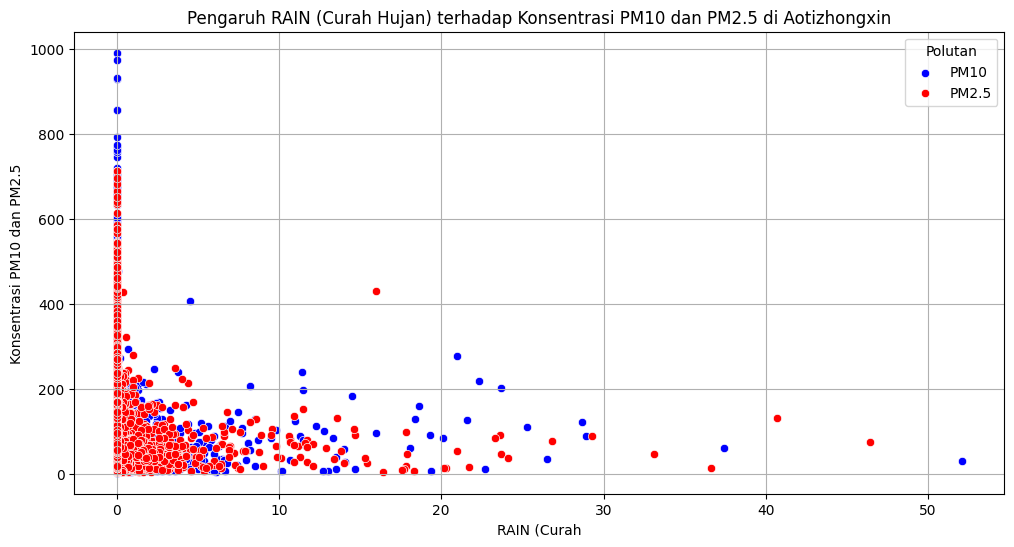

In [29]:
# Cek pengaruh RAIN terhadap konsentrasi PM10 dan PM2.5 pada kota Aotizhongxin

plt.figure(figsize=(12, 6))
sns.scatterplot(data=changping_df, x='RAIN', y='PM10', color='blue', label='PM10')
sns.scatterplot(data=aotizhongxin_df, x='RAIN', y='PM2.5', color='red', label='PM2.5')
plt.title('Pengaruh RAIN (Curah Hujan) terhadap Konsentrasi PM10 dan PM2.5 di Aotizhongxin')
plt.xlabel('RAIN (Curah')
plt.ylabel('Konsentrasi PM10 dan PM2.5')
plt.legend(title='Polutan')
plt.grid()
plt.show()

**Insight:**
- Kota Dingling lebih sering mengalami peningkatan konsentrasi O3 dalam nilai tinggi.
- Kita dapat mengetahui bahwa konsentrasi CO mengalami peningkatan di suhu rendah dan distribusi O3 akan mengalami peningkatan saat kota Dingling memiliki suhu tinggi.
- Sebagian besar titik terpusat di bagian kiri (curah hujan rendah), menunjukkan bahwa polutan PM10 dan PM2.5 cenderung lebih tinggi saat hujan rendah di kota Aotizhongxin.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 :

  Histogram konsentrasi O3 di Dingling, Changping, dan Aotizhongxin menunjukkan bahwa Dingling memiliki konsentrasi O3 tertinggi, dengan sebaran lebih luas dan kejadian O3 tinggi lebih sering. Sebaliknya, Aotizhongxin memiliki kadar O3 lebih rendah


- Conclution pertanyaan 2 :

  CO cenderung tinggi pada suhu rendah (-10 hingga 0) dan menurun saat suhu meningkat. O3 memiliki pola sebaliknya, yaitu meningkat seiring kenaikan suhu, meskipun tetap dalam konsentrasi yang jauh lebih rendah dibandingkan CO.
  Suhu mungkin menyebabkan penghasil CO lebih aktif pada suhu rendah dan mempercepat proses pembentukan O3 saat suhu tinggi

- Conclution pertanyaan 3 :

  Curah hujan cenderung menurunkan kadar PM10 dan PM2.5, tetapi efeknya tidak selalu konsisten, terutama saat hujan ringan. Pelu diperhatikan bahwa ada beberapa kasus di mana polutan masih tetap tinggi meskipun hujan turun, menunjukkan bahwa faktor lain mungkin juga berperan dalam konsentrasi polutan.